# Boolean logic and mutability
### Data 765 tutoring; September 13th 2021
---
# What is REPL?

[REPL (read-eval-print-loop)](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop) is a programming paradigm that is generally available for interpreted languages such as Python, shell scripting, JavaScript, Ruby, Haskell (interpreted as well as compiled) et cetera.

I like to think of REPL as _interactively_ and _iteratively_ programming rather than writing out source code in structured files. REPL involves directly programming in a Python shell such as the [base interpreter](https://docs.python.org/3/tutorial/interpreter.html) or the augmented [IPython](https://ipython.org/). Lines of code are executed immediately rather than writing and running a full script.

Jupyter is also a common REPL tool as you have access to nice IPython code blocks without using the shell directly.

Coding directly in a shell has an air of impermanence as you worry less about the quality of your output; you're not writing a program to be reused that must be idiomatic and proper. Thus, as a paradigm, REPL excels at:

* easing practing new concepts or features
* playing around with new libraries
* data analysis, especially E.D.A. or building preliminary models

REPL is also great for one off tasks without the hassle of writing a script.

You may write a few lines of code here and there or test out a new feature or a concept you're struggling with. For example, maybe you're practicing slice notation:

In [1]:
love_cats = "Cats are perfect!!!"

print(love_cats[:4])
print(love_cats[-3:])

Cats
!!!


Spinning up a Python interpreter to play around with new libraries is often useful depending on how much setup is required. [NumPy] is fairly easy to use without much work as are most math and data libraries.

GUI toolkits, such as the Python bindings to [GTK](https://www.gtk.org/) or [Qt](https://www.qt.io/), need more initalization, so they're harder to use from a REPL standpoint.

REPL is great for brief tasks in the same manner as one would use Bash (or any other shell). Here's an example of pulling a few reviews from the Steam A.P.I. for _Hyper Light Drifter_, an indie game. The reviews are saved into a file for further use.

N.b. my precluding comments is intentional since writing the code should be quick and dirty.

In [2]:
import requests
import json

payload = {"json": 1,
           "purchase_type": "all",
           "num_per_page": 100,
           "filter": "updated"
          }

response = requests.get("https://store.steampowered.com/appreviews/257850",
                        params=payload)

response.raise_for_status()

with open("hyper_light_drifter.json", 'w') as f:
    json.dump(response.json()["reviews"], f)

E.D.A. is a perfect use case for REPL since we're exploring our data for initial insights rather than writing our final code. REPL is great for quick and dirty plots. For example, we can load our data into a [pandas](https://pandas.pydata.org/) DataFrame to calculate some quick metrics.

In [3]:
import pandas as pd

hld_reviews = pd.read_json("hyper_light_drifter.json")
hld_reviews.set_index("timestamp_created", inplace=True)
hld_reviews.replace({"voted_up": {True: "Recommended",
                                  False: "Not recommended"}
                    },
                   inplace=True)
hld_reviews.voted_up = hld_reviews.voted_up.astype("category")
hld_reviews.head()

,recommendationid,author,language,review,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access
timestamp_created,,,,,,,,,,,,,
2021-09-13 06:08:35,99273973,"{'steamid': '76561198069176947', 'num_games_ow...",english,dank af,2021-09-13 06:08:35,Recommended,0,0,0.000000,0,True,False,False
2021-09-12 23:51:40,99261677,"{'steamid': '76561198839395768', 'num_games_ow...",english,highly atmospheric and beautiful. definitely w...,2021-09-12 23:51:40,Recommended,0,0,0.000000,0,False,False,False
2021-09-12 05:58:44,99210378,"{'steamid': '76561198070812011', 'num_games_ow...",english,Such poor level and enemy design I had to stop...,2021-09-12 05:58:44,Not recommended,1,0,0.467478,0,False,False,False
2021-09-11 22:17:46,99192294,"{'steamid': '76561198844275926', 'num_games_ow...",english,[h1] A Masterpiece [/h1]\n\nHyper Light Drifte...,2021-09-11 22:17:46,Recommended,0,0,0.000000,0,True,False,False
2021-09-11 20:19:35,99186952,"{'steamid': '76561198373403121', 'num_games_ow...",english,One of the best games out there in my opinion....,2021-09-11 20:19:35,Recommended,0,0,0.000000,0,True,False,False


And a quick plot...

Without labels! Which is a sin of course.

<BarContainer object of 2 artists>

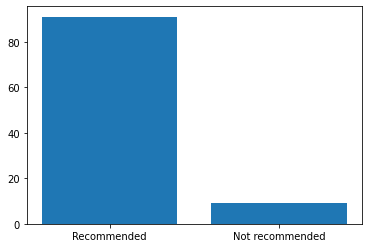

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

hld_recommends = hld_reviews.voted_up.value_counts()
plt.bar(hld_recommends.index, hld_recommends)

# Boolean logic questions

Boolean logic is integral to programming because control flow is essentially impossible without it. Let's try to understand it with a plain English example first.

Say we have a random human ordering a smoothie with the contrived sentence:

**"Do you have a strawberry banana OR peach mango OR mixed berry OR pineapple (et cetera...) smoothie?"**

To which the wonderful smoothie chef replies:

**"I have peach mango and mixed berry smoothies."**

**Question:** Would this statement evaluate to "yes" (True) or "no" (False) and why?

**Question:** Would the answer change if the shop owned only had strawberry banana? Why or why not?

We can represent this in Python:

In [ ]:
strawberry_banana = False
peach_mango = True
mixed_berry = True
pineapple = False

(strawberry_banana or peach_mango or mixed_berry or pineapple)

Run the cell **after** attempting to answer the question.

**Question:** Would the answer change if the smoothie patron wanted **every** flavor?

In other words: **"Do you have strawberry banana AND peach mango AND mixed berry AND pineapple (et cetera...) smoothies?"**

Again in Python:

In [ ]:
(strawberry_banana and peach_mango and mixed_berry and pineapple)

This represents an important concept in boolean logic. `or` is short circuiting so that if one statement is true then the entire statement is true. `and` requires the entire statement to be truthy.

## Examples
Evaluate the following.

In [ ]:
True or False

In [ ]:
True and False

In [ ]:
True and True

In [ ]:
False and False

In [ ]:
False or True or False or False or False or False or False or False or False or False or False or False or False or False or False

In [ ]:
(True or False) or (True and False)

In [ ]:
(True and True) and (False or (True and False))

In [ ]:
True and (False or True)

# Mutability

A Python object is immutable when we're prevented from changing its internal state.

This sounds really philosophical and scientific, but you generally just need to remember that **composite types are usually mutable and "primitive" types are immutable.**

Primitive types are numbers of all types and strings. Some composite types are immutable, like frozen sets. You'll usually know via the documentation.

Numbers are immutable. If we add two integers:

In [5]:
14 + 28

42

Python returns a new integer which is pretty logical when you think about it. The number `14` isn't changing internally through addition. On the other hand, appending an item to a `list` is mutating the object's state.

In [6]:
pokemon = ["Espeon"]
pokemon.append("Drampa")

Strings are immutable...because...Python wants them to be immutable. The answer isn't as neat as the integers example, but essentially strings are immutable because they can be cached or accessed safely across threads.

Thus, like integers, new strings are returned after string operations.

In [7]:
cats = "I like"
cats += " cats!!!!!!!!!"
cats

'I like cats!!!!!!!!!'

Similarly, string methods return a new string as well.

In [8]:
cats_two = cats.replace('c', 'm')

print(f"Original: {cats}\nEdited: {cats_two}")

Original: I like cats!!!!!!!!!
Edited: I like mats!!!!!!!!!


Your own types may be mutable or immutable (to an extent) depending on your public A.P.I. However, classes are out of the scope of this mini-lecture!